# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 8 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [2]:
### BEGIN YOUR CODE

Student_ID = 4

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [3]:
datasets = [('Combined Cycle Power Plant','https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant'), ('Beijing PM2.5','https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data'), ('Airfoil Self-Noise','https://archive.ics.uci.edu/dataset/291/airfoil+self+noise'), ('Energy Efficiency','https://archive.ics.uci.edu/dataset/242/energy+efficiency'), ('Bike Sharing','https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset'), ('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Bike Sharing' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [17]:
### BEGIN YOUR CODE

import pandas as pd
import itertools as it
import matplotlib as plt
### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [5]:
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets
print(X.columns)
# metadata
print(bike_sharing.metadata)

# variable information
print(bike_sharing.variables)


Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')
{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID

####  3. Посмотреть на общую картину (0.5 балла)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [6]:
# Загрузка данных
bike_sharing = fetch_ucirepo(id=275)
df = bike_sharing.data.features
# Размер датасета в МБ
dataset_size_mb = df.memory_usage(deep=True).sum() / (1024 ** 2)

# Количество записей и признаков
num_records, num_features = df.shape

# Проверка на пропущенные значения
missing_values = df.isnull().sum().sum()

# Статистическое описание
statistics = df.describe()

# Вывод информации
print(f"Размер датасета: {dataset_size_mb:.2f} МБ")
print(f"Количество записей: {num_records}")
print(f"Количество признаков: {num_features}")
print(f"Пропущенные значения: {'Есть' if missing_values > 0 else 'Нет'}")
print("\nОсновные статистические данные:")
print(statistics)

Размер датасета: 2.70 МБ
Количество записей: 17379
Количество признаков: 13
Пропущенные значения: Нет

Основные статистические данные:
             season            yr          mnth            hr       holiday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       2.501640      0.502561      6.537775     11.546752      0.028770   
std        1.106918      0.500008      3.438776      6.914405      0.167165   
min        1.000000      0.000000      1.000000      0.000000      0.000000   
25%        2.000000      0.000000      4.000000      6.000000      0.000000   
50%        3.000000      1.000000      7.000000     12.000000      0.000000   
75%        3.000000      1.000000     10.000000     18.000000      0.000000   
max        4.000000      1.000000     12.000000     23.000000      1.000000   

            weekday    workingday    weathersit          temp         atemp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.00000

Этот набор данных содержит почасовое и суточное количество прокатных велосипедов за период с 2011 по 2012 год в системе Capital bikeshare с соответствующей информацией о погоде и сезонах.  Требуется найти зависимость между температурой и числом прокатных велосипедов
<!-- Размер датасета составляет 100500 килобайт, что соответствует 100,5 мегабайтам. В датасете содержится описание ... -->

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками, постройте корреляционную матрицу. Некоторые из признаков могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

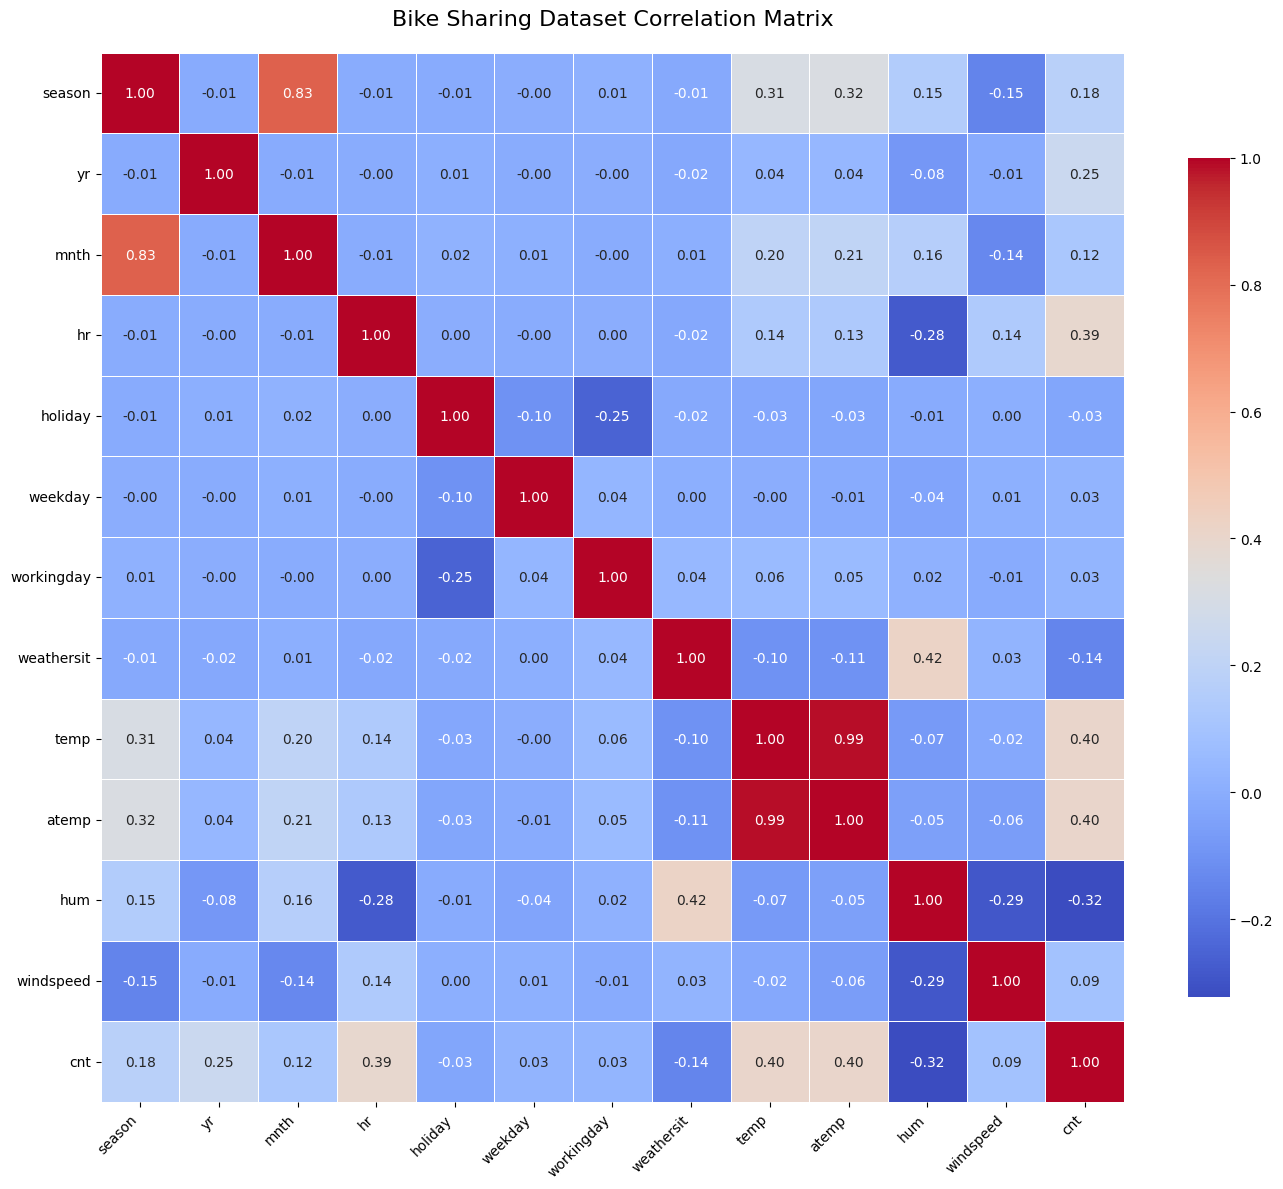

     season        yr      mnth        hr   holiday   weekday  workingday  \
0 -1.356634 -1.005134 -1.610438 -1.670004 -0.172112  1.493891     -1.4669   
1 -1.356634 -1.005134 -1.610438 -1.525374 -0.172112  1.493891     -1.4669   
2 -1.356634 -1.005134 -1.610438 -1.380744 -0.172112  1.493891     -1.4669   
3 -1.356634 -1.005134 -1.610438 -1.236115 -0.172112  1.493891     -1.4669   
4 -1.356634 -1.005134 -1.610438 -1.091485 -0.172112  1.493891     -1.4669   

   weathersit      temp     atemp       hum  windspeed       cnt  
0   -0.665193 -1.334648 -1.093281  0.947372  -1.553889 -0.956339  
1   -0.665193 -1.438516 -1.181732  0.895539  -1.553889 -0.824022  
2   -0.665193 -1.438516 -1.181732  0.895539  -1.553889 -0.868128  
3   -0.665193 -1.334648 -1.093281  0.636370  -1.553889 -0.972879  
4   -0.665193 -1.334648 -1.093281  0.636370  -1.553889 -1.039037  


In [27]:
### BEGIN YOUR CODE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Загрузка данных (замени путь при необходимости)


# Загрузка данных
bike_sharing = fetch_ucirepo(id=275)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# Объединяем признаки и целевую переменную
data = pd.concat([X, y], axis=1)

# Удаляем ненужные столбцы (если есть)
cols_to_drop = ['instant', 'dteday', 'casual', 'registered']
cols_to_drop = [col for col in cols_to_drop if col in data.columns]
data = data.drop(cols_to_drop, axis=1)

# Вычисляем корреляционную матрицу
corr_matrix = data.corr(numeric_only=True)

# Визуализация
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 10})
plt.title("Bike Sharing Dataset Correlation Matrix", pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Выбираем только числовые признаки (исключаем категориальные, если они не закодированы)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data[numeric_cols]

# Масштабирование
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

# Преобразуем обратно в DataFrame для удобства
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# Выводим первые 5 строк
print(scaled_df.head())
# при необходимости добавьте дополнительные ячейки с кодом, чтобы разбить код на смысловые блоки и повысить его читабельность

### END YOUR CODE

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [9]:
import numpy as np

class LinearRegressionModel:
    def __init__(self):
        self.theta = None  # параметры модели
        self.alpha = 0.01  # скорость обучения
        self.cost = 0      # значение функции стоимости
        self.cost_history = []  # история значений стоимости

    def _add_intercept(self, X):
        """Добавляет столбец единиц к матрице признаков"""
        return np.c_[np.ones((X.shape[0], 1)), X]

    def _compute_cost(self, X, y, theta):
        """Вычисляет MSE"""
        m = len(y)
        predictions = X.dot(theta)
        errors = predictions - y.reshape(-1, 1)
        return (1/(2*m)) * np.sum(errors**2)

    def gradient_descent(self, X, y, theta, alpha, iters):
        """Реализация градиентного спуска"""
        m = len(y)
        self.cost_history = []
        y = y.reshape(-1, 1)  # преобразуем y в вектор-столбец

        for _ in range(iters):
            predictions = X.dot(theta)
            errors = predictions - y
            gradient = (1/m) * X.T.dot(errors)
            theta -= alpha * gradient
            cost = self._compute_cost(X, y, theta)
            self.cost_history.append(cost)

        return theta, cost

    def fit_with_GD(self, X_train, y_train, alpha=0.01, iters=200):
        """Обучение градиентным спуском"""
        X_b = self._add_intercept(X_train)

        if self.theta is None:
            self.theta = np.zeros((X_b.shape[1], 1))

        self.alpha = alpha
        self.theta, self.cost = self.gradient_descent(X_b, y_train, self.theta, alpha, iters)
        return self.cost_history

    def fit_with_normal_equations(self, X_train, y_train):
        """Обучение через нормальные уравнения"""
        X_b = self._add_intercept(X_train)
        y = y_train.reshape(-1, 1)
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.cost = self._compute_cost(X_b, y, self.theta)
        return self.cost

    def predict(self, X_test):
        """Предсказание"""
        if self.theta is None:
            raise ValueError("Модель не обучена!")

        X_b = self._add_intercept(X_test)
        return X_b.dot(self.theta)

    def __str__(self):
        return (f"Параметры модели: {self.theta.flatten()}\n"
                f"Скорость обучения: {self.alpha}\n"
                f"Финальная стоимость: {self.cost:.4f}")

# Пример использования
if __name__ == "__main__":
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

    model = LinearRegressionModel()

    # Градиентный спуск
    cost_history = model.fit_with_GD(X, y, alpha=0.1, iters=1000)
    print("Градиентный спуск:")
    print(model)

    # Нормальные уравнения
    model_ne = LinearRegressionModel()
    model_ne.fit_with_normal_equations(X, y)
    print("\nНормальные уравнения:")
    print(model_ne)

    # Предсказание
    X_new = np.array([[0], [2]])
    print("\nПредсказания для X_new:")
    print(model.predict(X_new))

Градиентный спуск:
Параметры модели: [4.21509612 2.77011342]
Скорость обучения: 0.1
Финальная стоимость: 0.4033

Нормальные уравнения:
Параметры модели: [4.21509616 2.77011339]
Скорость обучения: 0.01
Финальная стоимость: 0.4033

Предсказания для X_new:
[[4.21509612]
 [9.75532296]]


* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

In [22]:
# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую

plt.figure(figsize=(20, 15))
# поместите сюда ваш код
iters = []

for i in range(0, 90, 10): # <- эти параметры имеет смысл подобрать самостоятельно
    my_model.alpha = i / 100
    costs = []
    for j in iters:
        costs.append(my_model.fit_with_GD(X_train, y_train, j))
    plt.plot(iters, costs)


# не забудьте про легенду
plt.xlabel('Количество итераций')
plt.ylabel(r'Функция качества $Q(\theta)$')
plt.title('Зависимость суммарной ошибки на обучающей выборке от количества итераций')


NameError: name 'X_train' is not defined

*Здесь можно написать свои комментарии по поводу графика и выбора наиболее подходящей скорости обучения*

- - -
#### 6. Решить систему нормальных уравнений (метод наименьших квадратов) (0.5 балла)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует нормирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [21]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код

my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train, y_train)

print(cost)
print(my_normal_equations_model)

NameError: name 'X_train' is not defined

- - -
#### 7. Сравнить разные методы (1.5 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?

+2 дополнительных балла за добавление к сравнению еще трех методов: встроенной реализации метода наименьших квадратов ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), гребневой регрессии (метод регуляризации Тихонова, [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)) и регрессии ([`LASSO`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).

In [ ]:
from sklearn.metrics import mean_squared_error

# Использование встроенной реализации метода стохастического градиентного спуска для построения модели
from sklearn.linear_model import SGDRegressor
my_sgd_model = SGDRegressor()
my_sgd_model.fit(X_train, y_train)
y_predict = my_sgd_model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
my_sgd_model_rmse = np.sqrt(mse)
print("SGD:", my_sgd_model_rmse)

# поместите сюда ваш код

*Здесь можно написать свои комментарии по поводу эффективности рассмотренных методов и качества их реализации*

- - -
#### 8. Опишите полученные результаты (0.5 балла)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

*Поместите сюда свой текст*

- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.